# Plot results


# Set up

In [1]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7084625652909850159
 xla_global_id: -1]

In [3]:
import keras
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import requests
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import random
from skimage import transform
import PIL
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Model, save_model, load_model
from keras.layers import Dense, Flatten, Dropout

from matplotlib.pyplot import figure

In [4]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [5]:
# Define paths:
pathtoImages = '/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Images/'

timings = 'test_timings/'
percentages = 'test_percentages/'
figure = 'fase1_138e22_15.jpg'

pathtoResults = '/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Models_performance/VGG19/EQ/'

In [6]:
# Define images: 
img_15p = image.load_img(pathtoImages + percentages + 'Test_15/' + figure, target_size=(224, 224))
img_30p = image.load_img(pathtoImages + percentages + 'Test_30/' + figure, target_size=(224, 224))
img_50p = image.load_img(pathtoImages + percentages + 'Test_50/' + figure, target_size=(224, 224))
img_80p = image.load_img(pathtoImages + percentages + 'Test_80/' + figure, target_size=(224, 224))
img_full = image.load_img(pathtoImages + 'Test/' + figure, target_size=(224, 224))
img_2s = image.load_img(pathtoImages + timings + 'Test_2s/' + figure, target_size=(224, 224))
img_5s = image.load_img(pathtoImages + timings + 'Test_5s/' + figure, target_size=(224, 224))
img_10s = image.load_img(pathtoImages + timings + 'Test_10s/' + figure, target_size=(224, 224))
img_15s = image.load_img(pathtoImages + timings + 'Test_15s/' + figure, target_size=(224, 224))

# Save results as unique plot

In [7]:
results_timings = pd.read_csv(pathtoResults + 'results_EQ_timings.csv')
results_percentages = pd.read_csv(pathtoResults + 'results_EQ_percentages.csv')

In [8]:
results_timings

,Unnamed: 0,dataset,loss,accuracy,precision,recall,auc,f1
0,0,val,1.931119,0.742489,0.748879,0.722944,0.822281,0.735683
1,1,full,1.928344,0.784000,0.724138,0.792453,0.823932,0.756757
2,2,15s,1.928461,0.776000,0.731481,0.745283,0.822556,0.738318
3,3,10s,1.936946,0.728000,0.697917,0.632075,0.812926,0.663366
4,4,5s,2.007092,0.684000,0.728814,0.405660,0.748460,0.521212
5,5,2s,2.070986,0.608000,0.595238,0.235849,0.624509,0.337838


In [9]:
results_percentages = pd.DataFrame(results_percentages)
results_timings = pd.DataFrame(results_timings)

In [10]:
def correct_x_axis(df, dataset):
  data = {'datasets': dataset,
         'loss': [df.iloc[5,2], df.iloc[4,2], df.iloc[3,2], df.iloc[2,2], df.iloc[1,2]],
         'accuracy': [df.iloc[5,3],df.iloc[4,3], df.iloc[3,3], df.iloc[2,3], df.iloc[1,3]],
         'precision': [df.iloc[5,4],df.iloc[4,4],df.iloc[3,4],df.iloc[2,4],df.iloc[1,4]],
         'recall': [df.iloc[5,5],df.iloc[4,5],df.iloc[3,5],df.iloc[2,5],df.iloc[1,5]],
         'auc': [df.iloc[5,6],df.iloc[4,6],df.iloc[3,6],df.iloc[2,6],df.iloc[1,6]],
         'f1': [df.iloc[5,7],df.iloc[4,7],df.iloc[3,7],df.iloc[2,7],df.iloc[1,7]],
         }
  data = pd.DataFrame(data)
  return data
datasets_timings = ['2', '5', '10', '15', '19']
datasets_percentages = ['15', '30', '50', '80', '100']
df_timings = correct_x_axis(results_timings, datasets_timings)
df_percentages = correct_x_axis(results_percentages, datasets_percentages)

In [11]:
df_timings

,datasets,loss,accuracy,precision,recall,auc,f1
0,2,2.070986,0.608,0.595238,0.235849,0.624509,0.337838
1,5,2.007092,0.684,0.728814,0.405660,0.748460,0.521212
2,10,1.936946,0.728,0.697917,0.632075,0.812926,0.663366
3,15,1.928461,0.776,0.731481,0.745283,0.822556,0.738318
4,19,1.928344,0.784,0.724138,0.792453,0.823932,0.756757


In [12]:
df_percentages

,datasets,loss,accuracy,precision,recall,auc,f1
0,15,2.125413,0.524,0.400000,0.245283,0.497805,0.304094
1,30,2.084696,0.604,0.561404,0.301887,0.633844,0.392638
2,50,2.009512,0.684,0.670886,0.500000,0.748690,0.572973
3,80,1.975703,0.716,0.654867,0.698113,0.779940,0.675799
4,100,1.928344,0.784,0.724138,0.792453,0.823932,0.756757


# Plot images

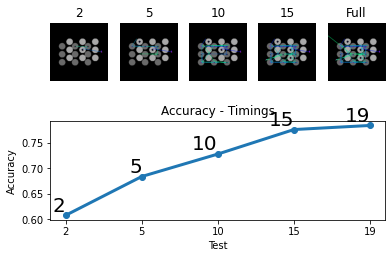

In [ ]:
# Plot accuracy for timings:
plt.subplot(2, 1, 2)
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(df_timings.iloc[:,0], df_timings.iloc[:,2], linewidth=3, marker='o')
plt.xlabel('Test', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy - Timings')
for i,j in zip(df_timings.iloc[:,0], df_timings.iloc[:,2]):
    plt.annotate(str(i),  xy=(i, j), fontsize=20, horizontalalignment='right', verticalalignment='bottom')

plt.subplot(2, 5, 1)
plt.imshow(img_2s);
plt.title('2');
plt.axis('off');
    
plt.subplot(2, 5, 2)
plt.imshow(img_5s);
plt.title('5');
plt.axis('off');

plt.subplot(2, 5, 3)
plt.imshow(img_10s);
plt.title('10');
plt.axis('off');

plt.subplot(2, 5, 4)
plt.imshow(img_15s);
plt.title('15');
plt.axis('off');

plt.subplot(2, 5, 5)
plt.imshow(img_full);
plt.title('Full');
plt.axis('off');

plt.savefig(pathtoResults + 'accuracy_timings_EQ.png')

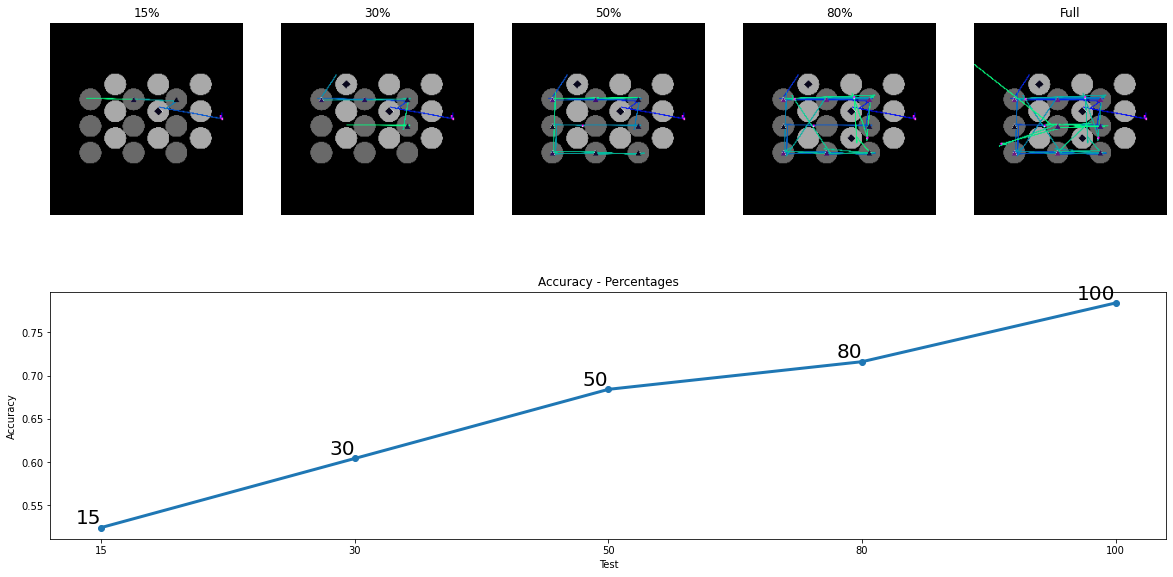

In [ ]:
plt.subplot(2, 1, 2)
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(df_percentages.iloc[:,0], df_percentages.iloc[:,2], linewidth=3, marker='o')
plt.xlabel('Test', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy - Percentages')   
for i,j in zip(df_percentages.iloc[:,0], df_percentages.iloc[:,2]):
    plt.annotate(str(i),  xy=(i, j), fontsize=20, horizontalalignment='right', verticalalignment='bottom')
    
plt.subplot(2, 5, 1)
plt.imshow(img_15p);
plt.title('15%');
plt.axis('off');
    
plt.subplot(2, 5, 2)
plt.imshow(img_30p);
plt.title('30%');
plt.axis('off');

plt.subplot(2, 5, 3)
plt.imshow(img_50p);
plt.title('50%');
plt.axis('off');

plt.subplot(2, 5, 4)
plt.imshow(img_80p);
plt.title('80%');
plt.axis('off');

plt.subplot(2, 5, 5)
plt.imshow(img_full);
plt.title('Full');
plt.axis('off');

plt.savefig(pathtoResults + 'accuracy_percentages_EQ.png')

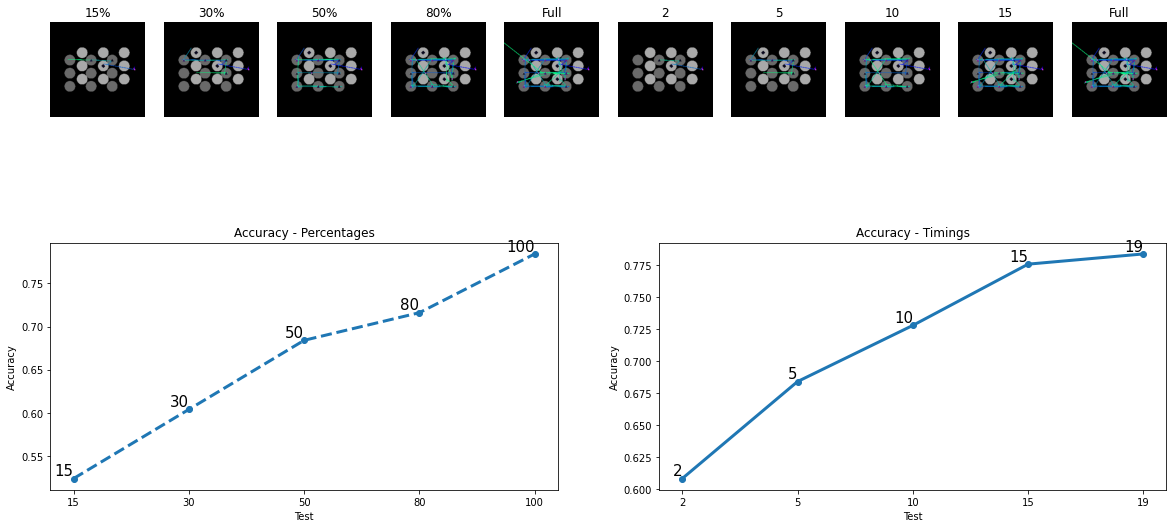

In [ ]:
plt.subplot(2, 2, 3)
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(df_percentages.iloc[:,0], df_percentages.iloc[:,2], linestyle= '--',linewidth=3, marker='o')
plt.xlabel('Test', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy - Percentages')   
for i,j in zip(df_percentages.iloc[:,0], df_percentages.iloc[:,2]):
    plt.annotate(str(i),  xy=(i, j), fontsize=15, horizontalalignment='right', verticalalignment='bottom')

plt.subplot(2, 10, 1)
plt.imshow(img_15p);
plt.title('15%');
plt.axis('off');
    
plt.subplot(2, 10, 2)
plt.imshow(img_30p);
plt.title('30%');
plt.axis('off');

plt.subplot(2, 10, 3)
plt.imshow(img_50p);
plt.title('50%');
plt.axis('off');

plt.subplot(2, 10, 4)
plt.imshow(img_80p);
plt.title('80%');
plt.axis('off');

plt.subplot(2, 10, 5)
plt.imshow(img_full);
plt.title('Full');
plt.axis('off');


plt.subplot(2, 2, 4)
plt.plot(df_timings.iloc[:,0], df_timings.iloc[:,2], linewidth=3, marker='o')
plt.xlabel('Test', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy - Timings')
for i,j in zip(df_timings.iloc[:,0], df_timings.iloc[:,2]):
    plt.annotate(str(i),  xy=(i, j), fontsize=15, horizontalalignment='right', verticalalignment='bottom')   

plt.subplot(2, 10, 6)
plt.imshow(img_2s);
plt.title('2');
plt.axis('off');
    
plt.subplot(2, 10, 7)
plt.imshow(img_5s);
plt.title('5');
plt.axis('off');

plt.subplot(2, 10, 8)
plt.imshow(img_10s);
plt.title('10');
plt.axis('off');

plt.subplot(2, 10, 9)
plt.imshow(img_15s);
plt.title('15');
plt.axis('off');

plt.subplot(2, 10, 10)
plt.imshow(img_full);
plt.title('Full');
plt.axis('off');

plt.savefig(pathtoResults + 'accuracy_EQ.png')

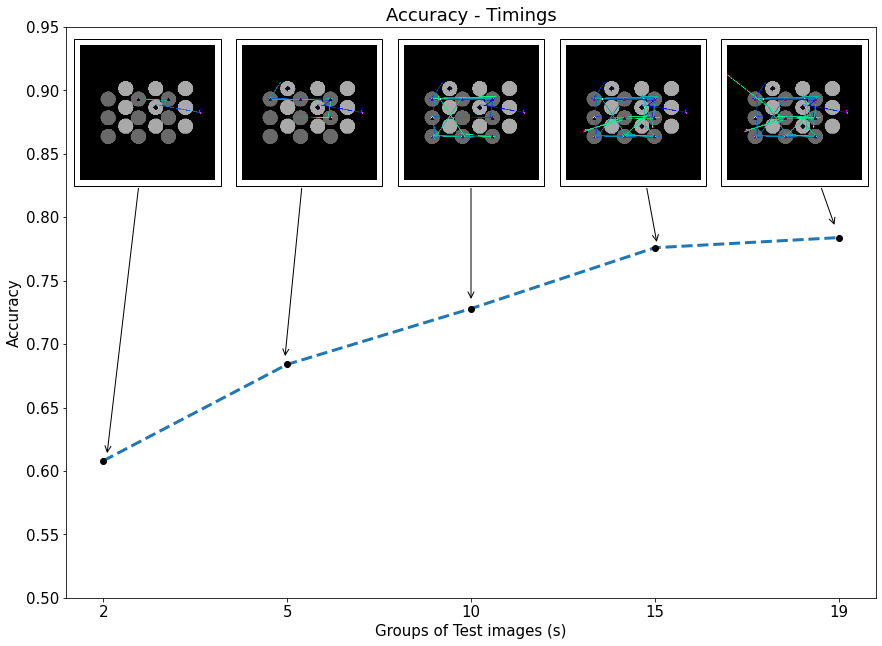

In [13]:
# Figure with images in plot for timings:
plt.rcParams.update({'font.size': 15})
fig, ax =plt.subplots(figsize = (8,8))
fig.set_size_inches(14.5, 10.5)
zm = .6
ax.plot(df_timings.iloc[:,0], df_timings.iloc[:,2], linewidth=3, linestyle= '--', zorder=1) 
ax.scatter(df_timings.iloc[:,0], df_timings.iloc[:,2], c='k', zorder=2)
ax.set_ylim([0.5, 0.95])
imgg = OffsetImage(img_full, zoom=zm)
xy = [0.95,0.65]
ab = AnnotationBbox(imgg, xy,
                    xybox=(0.9,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
#ab = AnnotationBbox(imgg, (0.3, 0.5), xycoords='axes fraction', box_alignment=(1.1,-0.1), arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab)
imgg_15 = OffsetImage(img_15s, zoom=zm)
xy2 = [0.73,0.62]
ab2 = AnnotationBbox(imgg_15, xy2,
                    xybox=(0.7,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab2)
imgg_10 = OffsetImage(img_10s, zoom=zm)
xy3 = [0.5,0.52]
ab3 = AnnotationBbox(imgg_10, xy3,
                    xybox=(0.5,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab3)
imgg_5 = OffsetImage(img_5s, zoom=zm)
xy4 = [0.27,0.42]
ab4 = AnnotationBbox(imgg_5, xy4,
                    xybox=(0.3,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab4)
imgg_2 = OffsetImage(img_2s, zoom=zm)
xy5 = [0.05,0.25]
ab5 = AnnotationBbox(imgg_2, xy5,
                    xybox=(0.1,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab5)
plt.xlabel('Groups of Test images (s)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy - Timings')
plt.savefig(pathtoResults + 'accuracy_timings_wt_images.png')
plt.show()

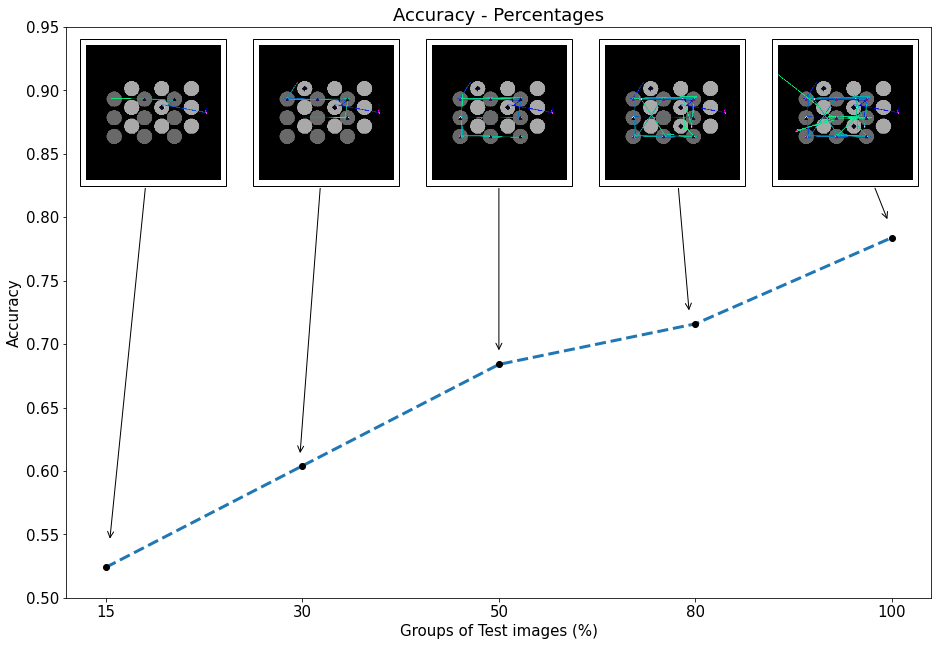

In [14]:
# Figures with images in plots for percentages:
plt.rcParams.update({'font.size': 15})
fig, ax =plt.subplots(figsize = (8,8))
fig.set_size_inches(15.5, 10.5)
zm = .6
ax.plot(df_percentages.iloc[:,0], df_percentages.iloc[:,2], linewidth=3, linestyle= '--', zorder=1) 
ax.scatter(df_percentages.iloc[:,0], df_percentages.iloc[:,2], c='k', zorder=2)
ax.set_ylim([0.5, 0.95])
imgg = OffsetImage(img_full, zoom=zm)
xy = [0.95,0.66]
ab = AnnotationBbox(imgg, xy,
                    xybox=(0.9,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
#ab = AnnotationBbox(imgg, (0.3, 0.5), xycoords='axes fraction', box_alignment=(1.1,-0.1), arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab)
imgg_80 = OffsetImage(img_80p, zoom=zm)
xy2 = [0.72,0.5]
ab2 = AnnotationBbox(imgg_80, xy2,
                    xybox=(0.7,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab2)
imgg_50 = OffsetImage(img_50p, zoom=zm)
xy3 = [0.5,0.43]
ab3 = AnnotationBbox(imgg_50, xy3,
                    xybox=(0.5,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab3)
imgg_30 = OffsetImage(img_30p, zoom=zm)
xy4 = [0.27,0.25]
ab4 = AnnotationBbox(imgg_30, xy4,
                    xybox=(0.3,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab4)
imgg_15 = OffsetImage(img_15p, zoom=zm)
xy5 = [0.05,0.1]
ab5 = AnnotationBbox(imgg_15, xy5,
                    xybox=(0.1,0.85),
                    xycoords='axes fraction',
                    boxcoords='axes fraction',
                    #box_alignment=(0,0),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab5)
plt.xlabel('Groups of Test images (%)', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy - Percentages')
plt.savefig(pathtoResults + 'accuracy_percentages_wt_images.png')
plt.show()